<a href="https://colab.research.google.com/github/SwatiUtekar/bharat_intern_task2/blob/main/iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
irisdata = pd.read_csv('Iris.csv')
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
irisdata['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
irisdata.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
irisdata['Species'] = le.fit_transform(irisdata['Species'])
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
x = irisdata.drop(columns=['Id', 'Species'])
y = irisdata['Species']
x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [10]:
print(y[:10])

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Species, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=20)

In [12]:
x_train.shape

(105, 4)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:2])

[[-1.38146701  0.2293509  -1.35243628 -1.29318002]]
[[-1.38146701  0.2293509  -1.35243628 -1.29318002]
 [-0.53742856  1.7618319  -1.1293321  -1.03937834]]


In [19]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [21]:
Irismodel = Sequential()
Irismodel.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
Irismodel.add(Dense(units=32, activation='relu'))
Irismodel.add(Dropout(0.5))
Irismodel.add(Dense(units=3, activation='softmax'))

In [22]:
Irismodel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
Irismodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
Irismodel.fit(x_train, y_train, epochs=500, verbose=2)

Epoch 1/500
4/4 - 1s - loss: 1.2217 - accuracy: 0.3333 - 820ms/epoch - 205ms/step
Epoch 2/500
4/4 - 0s - loss: 1.1580 - accuracy: 0.3524 - 11ms/epoch - 3ms/step
Epoch 3/500
4/4 - 0s - loss: 1.1126 - accuracy: 0.3143 - 13ms/epoch - 3ms/step
Epoch 4/500
4/4 - 0s - loss: 1.0252 - accuracy: 0.4667 - 13ms/epoch - 3ms/step
Epoch 5/500
4/4 - 0s - loss: 0.9536 - accuracy: 0.5524 - 13ms/epoch - 3ms/step
Epoch 6/500
4/4 - 0s - loss: 0.9460 - accuracy: 0.5429 - 13ms/epoch - 3ms/step
Epoch 7/500
4/4 - 0s - loss: 0.8508 - accuracy: 0.6762 - 17ms/epoch - 4ms/step
Epoch 8/500
4/4 - 0s - loss: 0.8205 - accuracy: 0.6667 - 12ms/epoch - 3ms/step
Epoch 9/500
4/4 - 0s - loss: 0.7950 - accuracy: 0.7429 - 12ms/epoch - 3ms/step
Epoch 10/500
4/4 - 0s - loss: 0.7543 - accuracy: 0.8000 - 12ms/epoch - 3ms/step
Epoch 11/500
4/4 - 0s - loss: 0.7136 - accuracy: 0.7714 - 12ms/epoch - 3ms/step
Epoch 12/500
4/4 - 0s - loss: 0.7283 - accuracy: 0.7810 - 12ms/epoch - 3ms/step
Epoch 13/500
4/4 - 0s - loss: 0.6439 - accurac

In [30]:
prediction = Irismodel.predict(x_test)
print(prediction[:10])

2/2 [==============================] - 0s 5ms/step
[[9.99999940e-01 4.49786208e-09 2.24948402e-12]
 [1.85741919e-06 9.99997079e-01 9.14808936e-07]
 [7.64571814e-06 9.99988258e-01 4.10423854e-06]
 [6.24515596e-05 9.69421506e-01 3.05160563e-02]
 [5.03283616e-07 9.99999464e-01 2.82339521e-08]
 [2.07033258e-06 9.99994814e-01 3.09413485e-06]
 [8.06519473e-09 2.29420712e-05 9.99976933e-01]
 [9.99999940e-01 1.38999425e-08 1.79591047e-11]
 [8.07839839e-08 2.08388665e-03 9.97915983e-01]
 [9.99999940e-01 2.72783751e-08 4.32296299e-12]]


In [31]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:10])

[0 1 1 1 1 1 2 0 2 0]


In [32]:
print(y_test[:10])

47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
Name: Species, dtype: int64


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.8888888888888888


In [34]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[13  0  0]
 [ 0 18  0]
 [ 0  5  9]]


Text(50.72222222222221, 0.5, 'actual')

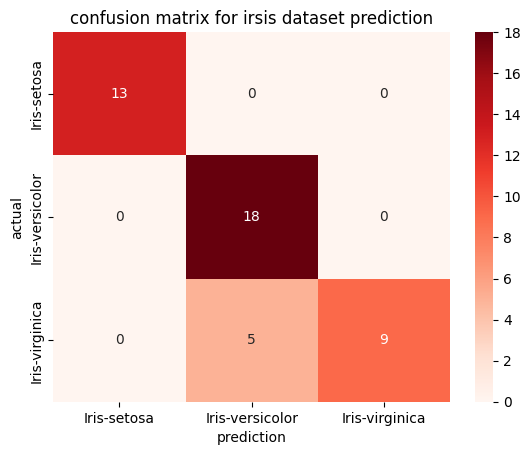

In [36]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction')
ax.set_ylabel('actual')

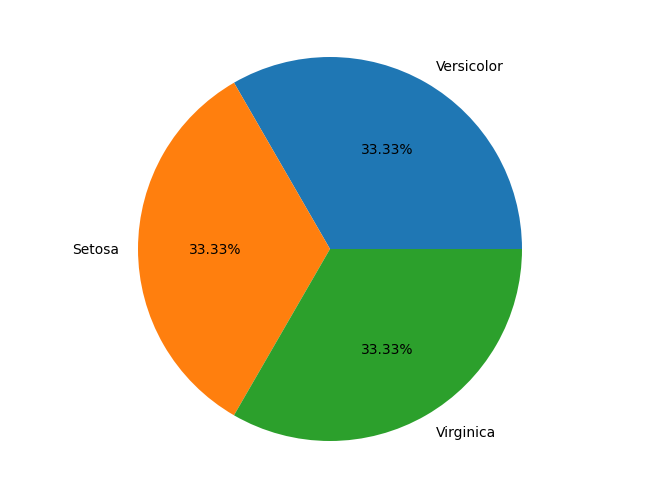

In [54]:
fig = plt.figure()
ax = fig.add_axes([1,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

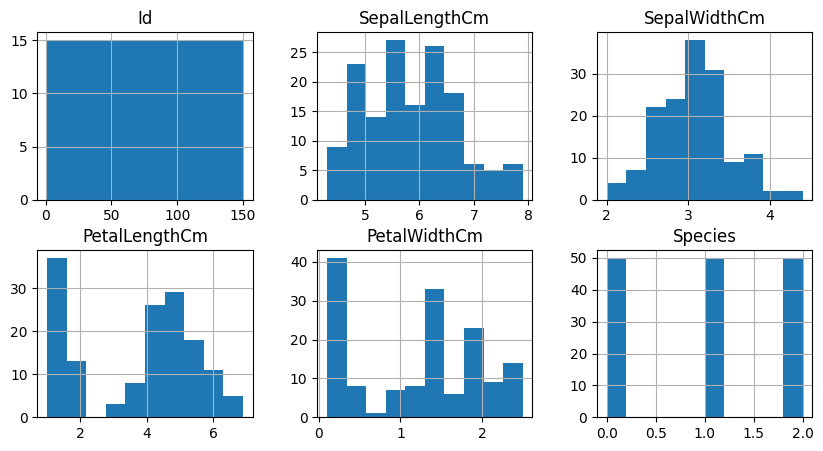

In [80]:
irisdata.hist(layout =(2,3), figsize=(10, 5))
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

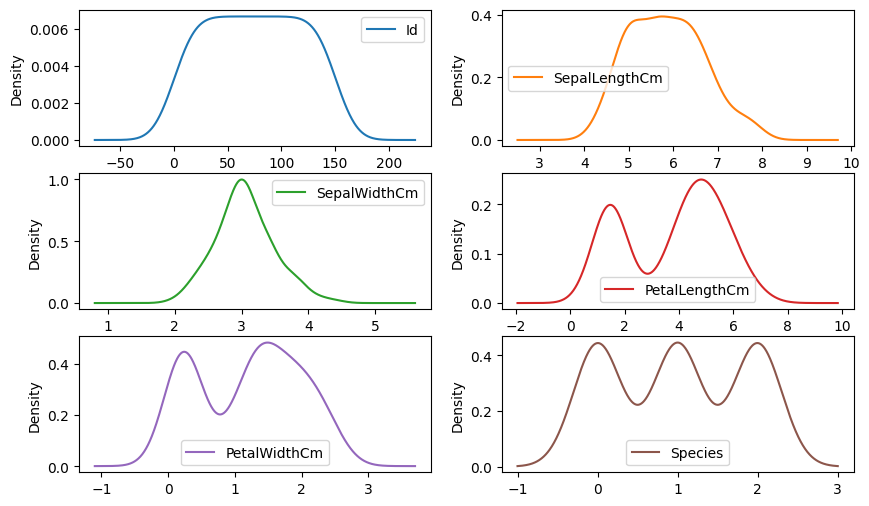

In [72]:
irisdata.plot(kind ='density',subplots = True, layout =(3,2),sharex = False ,figsize=(10, 6))